Generating region chart..


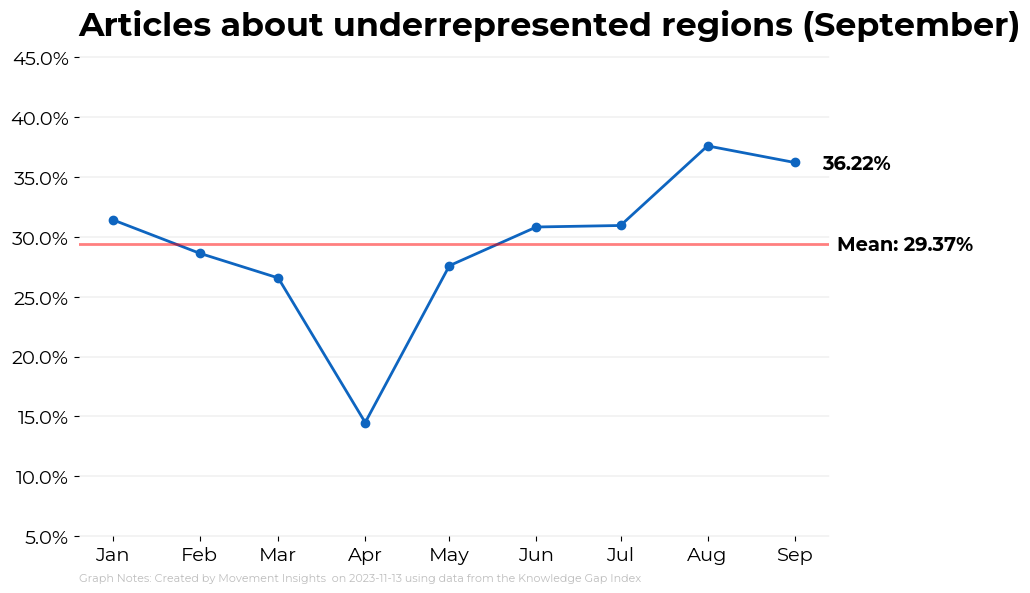

In [97]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date, datetime
import calendar
import warnings
%run wikicharts.ipynb


def main():
    
    print("Generating region chart..")
    df = pd.read_csv(content_gap_data_path, sep='\t')
    #---PARAMETERS---
    save_file_name = "Underrepresented Region Growth.png"
    display_flag = True


    #note start and end dates may be different depending on chart_type
    start_date = datetime(datetime.now().year, 1, 1).strftime('%Y-%m-%d')
    end_date = datetime.today()

    #convert string to datetime
    df['month'] = pd.to_datetime(df['month'])

    #truncate data to period of interest
    df = df[df["month"].isin(pd.date_range(start_date, end_date))]


    #---MAKE CHART---
    
    # Create column for scatterplot
    df['timestamp'] = pd.to_datetime(df['month'], format='%Y-%m')
    
    chart = Wikichart(start_date, end_date, df, time_col='month')
    chart.init_plot()

    chart.plot_line('month', '% of new articles about underrepresented regions', wmf_colors['blue'])
    plt.scatter(df['month'], df['% of new articles about underrepresented regions'], color=wmf_colors['blue'], zorder=5)
  
    chart.format(title='Articles about underrepresented regions', 
                 data_source="the Knowledge Gap Index",
                 titlepad=15,
                 format_x_monthly=True,
                perc=True)

  
    
     # Set the y-axis limit from 0 to the maximum value in the 'underrepresented' column
    #plt.gca().set_ylim(0.00, df['% of new articles about underrepresented regions'].max()) 

    # Define ticks based on the new y-axis
    #ticks = np.arange(0.00, df['% of new articles about underrepresented regions'].max() +0.05, 0.05)
    #plt.yticks(ticks, [f"{int(tick*100)}%" for tick in ticks])
    
    # Annotations 
    chart.annotate(x='month',
            y='% of new articles about underrepresented regions',
            use_last_y=True,
            perc = True)

    chart.annotate_mean(x= 'month', y='% of new articles about underrepresented regions')
    
    

    # show plot
    chart.finalize_plot(save_file_name)

if __name__ == "__main__":
    main()


Generating Women % Distribution chart...


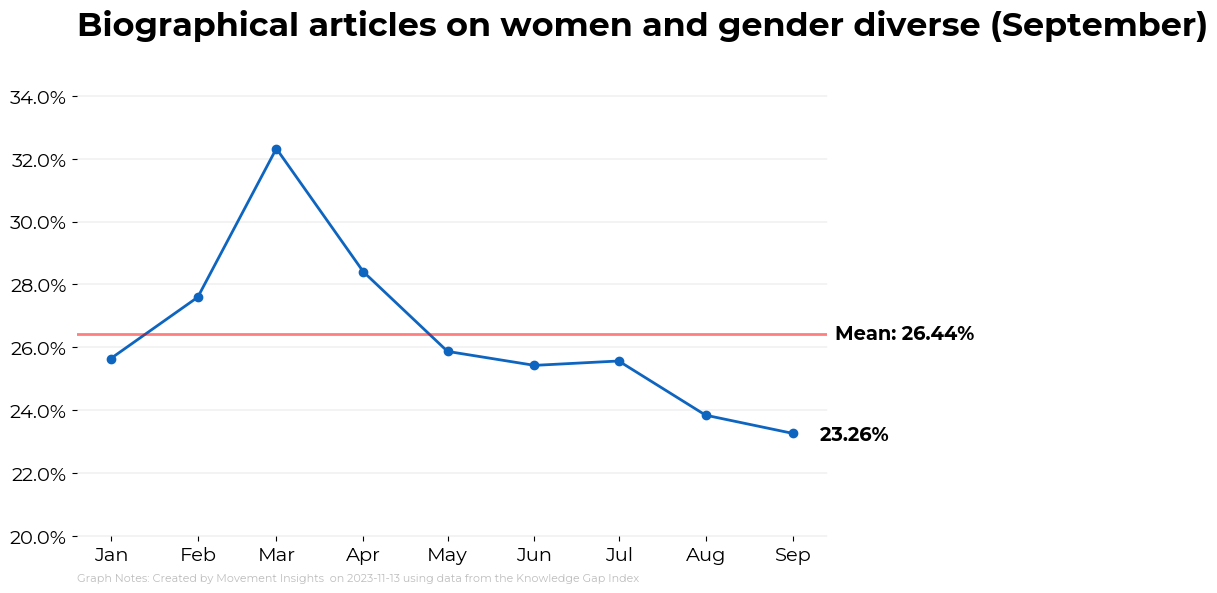

In [98]:

def main():
    print("Generating Women % Distribution chart...")
    df = pd.read_csv(content_gap_data_path, sep='\t')
    #---PARAMETERS---
    save_file_name = "Women_Percentage_Distribution.png"
    display_flag = True
    
    
    #note start and end dates may be different depending on chart_type
    start_date = datetime(datetime.now().year, 1, 1).strftime('%Y-%m-%d')
    end_date = datetime.today()

    #convert string to datetime
    df['month'] = pd.to_datetime(df['month'])

    #truncate data to period of interest
    df = df[df["month"].isin(pd.date_range(start_date, end_date))]
    
    #---MAKE CHART---
    
    df['timestamp'] = pd.to_datetime(df['month'], format='%Y-%m')

    chart = Wikichart(start_date, end_date, df, time_col='month') # Initialization
    chart.init_plot()

    chart.plot_line('month', '% of new articles about gender minorities', wmf_colors['blue'])
    plt.scatter(df['month'], df['% of new articles about gender minorities'], color=wmf_colors['blue'], zorder=5)


    chart.format(title='Biographical articles on women and gender diverse',
             data_source="the Knowledge Gap Index",
             titlepad=15,
             format_x_monthly=True,
             perc = True)
    
   # Set the y-axis limit from 0 to the maximum value in the 'proportion' column
    #plt.gca().set_ylim(0.00, df['% of new articles about gender minorities'].max()) 

    # Define ticks based on the new y-axis range
    #ticks = np.arange(0.00, df['% of new articles about gender minorities'].max() + 0.05 , 0.05)
    #plt.yticks(ticks, [f"{int(tick*100)}%" for tick in ticks])
    
    #  Annotations 
    
    chart.annotate(x='month',
            y='% of new articles about gender minorities',
            use_last_y=True,
            perc = True)
    
    chart.annotate_mean(x= 'month', y='% of new articles about gender minorities')
   
   
    
    
    # display plot
    chart.finalize_plot(save_file_name)

if __name__ == "__main__":
    main()
